<a href="https://colab.research.google.com/github/evergreenllc2020/clip/blob/main/Noise_Removal_with_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch trochvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement trochvision (from versions: none)
ERROR: No matching distribution found for trochvision


In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/"

'11th Grade Event 4.16.21.pdf'
'2017 Tax Return Documents (SADAPHULE RAVINDRA and).pdf'
'210125 Sadaphule 1st draft - mas.pdf'
 7021DB05-B5D2-47D9-9271-9410FBF4BF7B.JPG
'812 Rosepoint Sale'
'95 Professional Center Pkwy.gmap'
 A48D414FC4274730BBCBCD5456AEC2F9.pdf
'Avenue One Master - 150518 - Annual Policy Statement.pdf'
'Avenue One Master - 180102 - Information Handbook (1).pdf'
 cedar_fair_#5483200_11071.pdf
 Chemistry_Honors_Packet.pdf
 CLenar.pdf
'Client Information.pdf'
 Colab
'Colab Notebooks'
'Copy of Al-Shabaab Stakeholder Analysis [TEMPLATE].gslides'
'Copy of Canva x Parent & Child Template.gsheet'
'Copy of Design a Disruption Hypothesis Activity [Non-VirBELA Version for 2 People].gslides'
'Copy of Design a Disruption Hypothesis Activity [Non-VirBELA Version for 3 People].gslides'
'Copy of Disruption Framework and Three Pillars [Template].gslides'
'Copy of Empathy Map Template.gslides'
'Copy of Story Workbook - Fall 2021 (1).gslides'
'Copy of Story Workbook - Fall 2021 (2).gsli

In [4]:
!pip install ftfy regex tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.8 MB/s 


In [5]:
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-yh62zbvq
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-yh62zbvq
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=0a5d202342033611b02fff76f6119ad360a87220dc30756f9f92ee170d1d638d
  Stored in directory: /tmp/pip-ephem-wheel-cache-529vyozc/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


In [15]:
import os
import clip
import torch
from PIL import Image
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
#cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
#image, class_id = cifar100[3637]
#image_input = preprocess(image).unsqueeze(0).to(device)
#ext_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)


In [23]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

Resized image to 224, 224


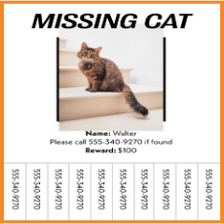

reward:79.41%
number:20.60%
found:96.80%
tear-off:1.19%
phone:7.45%
cat:94.22%
missing:99.91%
animal:7.32%
tear-away:3.02%
dog:3.15%
pet:76.33%


In [88]:
import sys
import requests
import numpy as np
image_name = "pexels-photo-1485637.jpeg"
image_url = f"https://evergreenllc2020.github.io/blog3/images/missingdog.jpg"

raw_image = Image.open(requests.get(image_url, stream=True).raw)
#print("Raw Image to be processed")
#display(raw_image)

#Resize the image
image_input = raw_image.resize((224,224))
print("Resized image to 224, 224")
display(image_input)


#raw_image = Image.open("/content/drive/My Drive/Colab Notebooks/CLIP/images/christmas.jpg")

#image_input = preprocess(Image.open("/content/drive/My Drive/Colab Notebooks/CLIP/images/christmas.jpg")).unsqueeze(0).to(device)

image_input = preprocess(image_input)
image_input = image_input.unsqueeze(0).to(device)
prompts = ["reward","number","found","tear-off","phone","cat","missing","animal","tear-away","dog","pet"]

for label in prompts:
  text_raw = ["aaa","bbb","ccc"]
  text_raw[2] = label
  text_inputs = clip.tokenize(text_raw).to(device)
  
  # Calculate features
  with torch.no_grad():
      image_features = model.encode_image(image_input)
      text_features = model.encode_text(text_inputs)
      logits_per_image, logits_per_text = model(image_input, text_inputs)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

  #display(raw_image)
  #for idx in range(len(text_raw)):
  #  print(f"{text_raw[idx] }:{100*probs[0,idx]:.2f}%")
  print(f"{text_raw[2] }:{100*probs[0,2]:.2f}%")